In [38]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib import cm

In [39]:
root_file_dir= '~/Desktop/ROOT_files/'
file1= uproot.open(root_file_dir + 'flat_caf_0-833995dc-14a2-47e7-9a95-91e25102b7ef.root:recTree;29')
file2= uproot.open(root_file_dir + 'flat_caf_1-1637ea75-449f-467f-abd7-9e2f4f9710a7.root:recTree;31')
file3= uproot.open(root_file_dir + 'flat_caf_2-16432aaf-a139-4cb0-8c09-26f5af8c457f.root:recTree;31')
file4= uproot.open(root_file_dir + 'flat_caf_3-1ffa5d5d-a703-4c89-be04-dd5e6d458981.root:recTree;31')
file5= uproot.open(root_file_dir + 'flat_caf_4-d0f08994-a5a3-4420-8600-616832f5adbb.root:recTree;31')

In [52]:
def get_cut(start, end):
    cut_xf0= (end['xf'])>-250
    cut_xf1= (end['xf'])<250
    cut_xf2= (end['xf'])>50
    cut_xf3= (end['xf'])<-50     
    cut_yf= (np.absolute(end['yf'])<250)
    cut_zf0= (end['zf'])>0
    cut_zf1= (end['zf'])<500

    cut_x00= (start['x0'])>-250
    cut_x01= (start['x0'])<250
    cut_x02= (start['x0'])>50
    cut_x03= (start['x0'])<-50  
    cut_y0= (np.absolute(start['y0'])<250)
    cut_z00= (start['z0'])>0
    cut_z01= (start['z0'])<500

    cut_full= cut_xf0 & cut_xf1 & cut_xf2 & cut_xf3 & cut_yf & cut_zf0 & cut_zf1 & cut_x0 & cut_y0 & cut_z00 & cut_z01 & 
    cut= np.full(ak.num(cut_full, axis=0), True)

    for i in range(ak.num(cut_full, axis=0)):
        for j in range(ak.num(cut_full)[i]):
            if cut_full[i][j]== False:
                cut[i]= False

    return cut

SyntaxError: invalid syntax (2933951766.py, line 18)

In [53]:
start1= file1.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end1= file1.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})
rr_1= file1['rec.reco.trk.calo.2.points.rr'].array()
dedx_1= file1['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
start2= file2.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end2= file2.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})
rr_2= file2['rec.reco.trk.calo.2.points.rr'].array()
dedx_2= file2['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
start3= file3.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end3= file3.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})   
rr_3= file3['rec.reco.trk.calo.2.points.rr'].array()
dedx_3= file3['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
start4= file4.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end4= file4.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})  
rr_4= file4['rec.reco.trk.calo.2.points.rr'].array()
dedx_4= file4['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
start5= file5.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end5= file5.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'}) 
rr_5= file5['rec.reco.trk.calo.2.points.rr'].array()
dedx_5= file5['rec.reco.trk.calo.2.points.dedx'].array()

(array([ 979.,  178.,  212.,  196.,  199.,  211.,  454.,  247.,  277.,
         264.,  302.,  294.,  254.,  297.,  339.,  291.,  299.,  308.,
         301.,  334.,  316.,  294.,  325.,  342.,  331.,  352.,  339.,
         339.,  362.,  347.,  347.,  377.,  384.,  396.,  419.,  361.,
         391.,  400.,  435.,  397.,  367.,  400., 2034.,  890.,  618.,
         707.,  704.,  699.,  708.,  641.,  635.,  736.,  671.,  636.,
         703.,  636.,  957., 1953.,  404.,  441.,  429.,  432.,  385.,
         430.,  366.,  377.,  412.,  375.,  382.,  377.,  324.,  383.,
         357.,  357.,  340.,  349.,  347.,  346.,  356.,  305.,  346.,
         266.,  345.,  306.,  342.,  291.,  299.,  289.,  288.,  297.,
         251.,  271.,  289.,  472.,  224.,  231.,  221.,  189.,  162.,
        1009.]),
 array([-2.33277878e+02, -2.28611923e+02, -2.23945969e+02, -2.19280014e+02,
        -2.14614075e+02, -2.09948120e+02, -2.05282166e+02, -2.00616211e+02,
        -1.95950256e+02, -1.91284302e+02, -1.86618

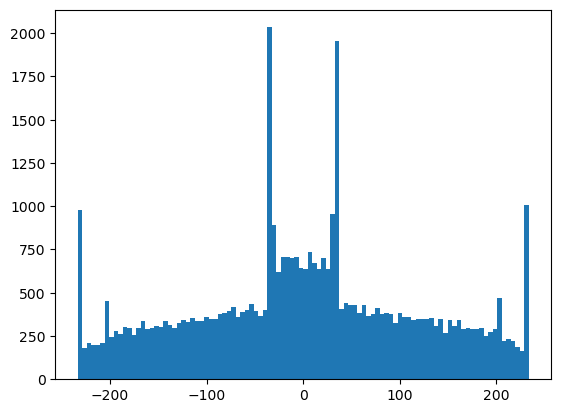

In [54]:
plt.hist(ak.flatten(file1['rec.reco.trk.start.x'].array()).to_numpy(), bins=100)

In [55]:
cut_1= get_cut(start1, end1)
cut_2= get_cut(start2, end2)
cut_3= get_cut(start3, end3)
cut_4= get_cut(start4, end4)
cut_5= get_cut(start5, end5)

In [56]:
rr= ak.flatten(ak.concatenate([rr_1[cut_1], rr_2[cut_2], rr_3[cut_3], rr_4[cut_4], rr_5[cut_5]], axis=0)).to_numpy()
dedx= ak.flatten(ak.concatenate([dedx_1[cut_1], dedx_2[cut_2], dedx_3[cut_3], dedx_4[cut_4], dedx_5[cut_5]], axis=0)).to_numpy()

remove= np.where((dedx>50)|(rr>25))
rr= np.delete(rr, remove)
dedx= np.delete(dedx, remove)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0

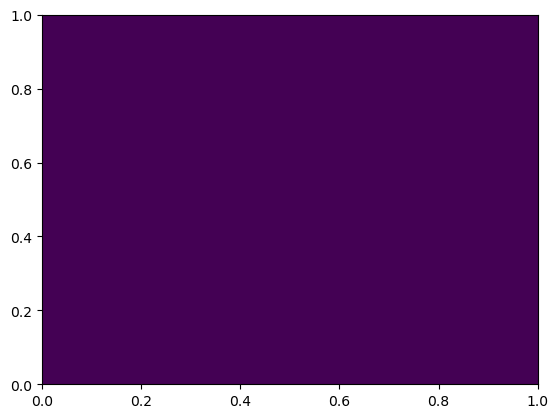

In [57]:
plt.hist2d(rr, dedx, bins=100)